In [62]:
import pandas as pd

experiment_files = {
    "standard alpha=1.0": "results/log_0_ResNet18_standard_1.0.csv",
    "weighted alpha=1.0 gamma=0.5": "results/log_0_ResNet18_weighted_0.5.csv",
    "weighted alpha=1.0 gamma=0.25": "results/log_0_ResNet18_weighted_0.25.csv",
    "weighted alpha=1.0 gamma=0.125": "results/log_0_ResNet18_weighted_0.125.csv",
    "weighted alpha=1.0 gamma=1": "results/log_0_ResNet18_weighted_1.csv",
    "weighted alpha=1.0 gamma=2": "results/log_0_ResNet18_weighted_2.csv",
    "weighted alpha=1.0 gamma=4": "results/log_0_ResNet18_weighted_4.csv",
    "weighted alpha=1.0 gamma=8": "results/log_0_ResNet18_weighted_8.csv",
    "standard alpha=0.1": "results/log_alpha01_ResNet18_standard_1.0.csv",
    "standard alpha=0.2": "results/log_alpha02_ResNet18_standard_1.0.csv",
    "erm decay=1e-2": "results/log_decay1e-2_ResNet18_erm_1.0.csv",
    "erm decay=1e-3": "results/log_decay1e-3_ResNet18_erm_1.0.csv",
    "erm decay=1e-4": "results/log_decay1e-4_ResNet18_erm_1.0.csv",
    "weighted alpha=1.0 gamma=0.5 mu=0": "results/log_mu0_ResNet18_weighted_0.5.csv",
    "weighted alpha=1.0 gamma=0.25 mu=0": "results/log_mu0_ResNet18_weighted_0.25.csv",
    "weighted alpha=1.0 gamma=0.125 mu=0": "results/log_mu0_ResNet18_weighted_0.125.csv",
    "weighted alpha=1.0 gamma=1 mu=0": "results/log_mu0_ResNet18_weighted_1.csv",
    "weighted alpha=0.1 gamma=1 mu=0.5": "results/log_mu05_alpha01_ResNet18_weighted_1.csv",
    "weighted alpha=0.2 gamma=1 mu=0.5": "results/log_mu05_alpha02_ResNet18_weighted_1.csv",
    "weighted alpha=1.0 gamma=0.5 mu=0.5": "results/log_mu05_ResNet18_weighted_0.5.csv",
    "weighted alpha=1.0 gamma=0.25 mu=0.5": "results/log_mu05_ResNet18_weighted_0.25.csv",
    "weighted alpha=1.0 gamma=0.125 mu=0.5": "results/log_mu05_ResNet18_weighted_0.125.csv",
    "weighted alpha=1.0 gamma=1 mu=0.5": "results/log_mu05_ResNet18_weighted_1.csv",
}

df = pd.concat(
    [
        pd.read_csv(file).assign(experiment=experiment)
        for experiment, file in experiment_files.items()
    ]
)

df["train acc"] = df["train acc"] / 100
df["test acc"] = df["test acc"] / 100

In [63]:
print("Best test accuracy at any epoch for each experiment:")
print(df.groupby("experiment")["test acc"].max().sort_values(ascending=False))

Best test accuracy
experiment
weighted alpha=1.0 gamma=0.25 mu=0.5     0.9471
weighted alpha=1.0 gamma=0.25 mu=0       0.9457
weighted alpha=1.0 gamma=0.125 mu=0      0.9446
weighted alpha=1.0 gamma=0.125           0.9441
weighted alpha=1.0 gamma=0.5 mu=0        0.9441
weighted alpha=1.0 gamma=1 mu=0          0.9440
weighted alpha=1.0 gamma=0.125 mu=0.5    0.9436
weighted alpha=1.0 gamma=1 mu=0.5        0.9432
weighted alpha=1.0 gamma=1               0.9429
weighted alpha=1.0 gamma=0.5             0.9428
standard alpha=1.0                       0.9417
weighted alpha=1.0 gamma=0.5 mu=0.5      0.9417
weighted alpha=1.0 gamma=0.25            0.9411
standard alpha=0.2                       0.9410
weighted alpha=1.0 gamma=2               0.9397
weighted alpha=0.1 gamma=1 mu=0.5        0.9391
weighted alpha=0.2 gamma=1 mu=0.5        0.9389
standard alpha=0.1                       0.9374
weighted alpha=1.0 gamma=4               0.9327
weighted alpha=1.0 gamma=8               0.9168
erm decay=

In [64]:
print("Best median test accuracy in last 10 epochs for each experiment:")
last_10 = df.groupby("experiment")["test acc"].apply(lambda x: x.tail(10))
medians = last_10.groupby("experiment").median()
medians.sort_values(ascending=False)

Best median test accuracy in last 10 epochs


experiment
weighted alpha=1.0 gamma=0.25 mu=0.5     0.94065
standard alpha=0.2                       0.93960
weighted alpha=1.0 gamma=1               0.93920
weighted alpha=1.0 gamma=1 mu=0.5        0.93850
weighted alpha=1.0 gamma=0.125 mu=0.5    0.93830
weighted alpha=0.2 gamma=1 mu=0.5        0.93795
weighted alpha=0.1 gamma=1 mu=0.5        0.93755
standard alpha=0.1                       0.93635
standard alpha=1.0                       0.93470
weighted alpha=1.0 gamma=0.5 mu=0        0.93450
weighted alpha=1.0 gamma=0.5             0.93425
weighted alpha=1.0 gamma=0.5 mu=0.5      0.93420
weighted alpha=1.0 gamma=0.125           0.93370
weighted alpha=1.0 gamma=2               0.93295
weighted alpha=1.0 gamma=0.25 mu=0       0.93105
weighted alpha=1.0 gamma=1 mu=0          0.92975
weighted alpha=1.0 gamma=0.125 mu=0      0.92920
weighted alpha=1.0 gamma=0.25            0.92485
weighted alpha=1.0 gamma=4               0.92325
weighted alpha=1.0 gamma=8               0.89540
erm decay

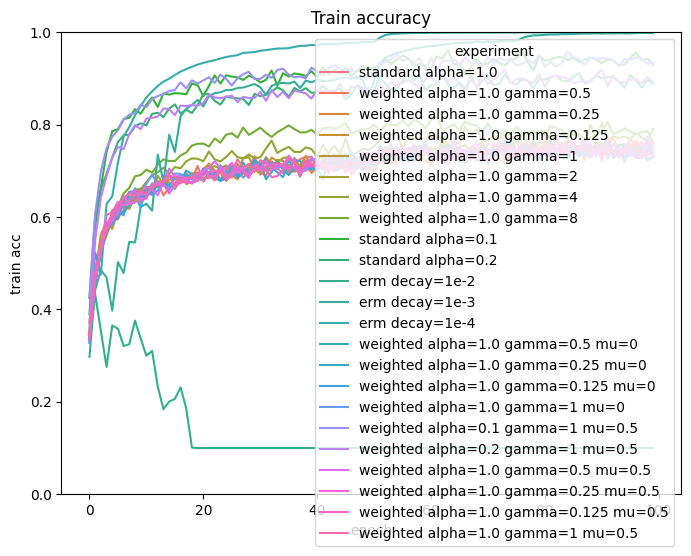

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x="epoch", y="train acc", hue="experiment")
plt.ylim(0, 1)
plt.title("Train accuracy")
plt.show()

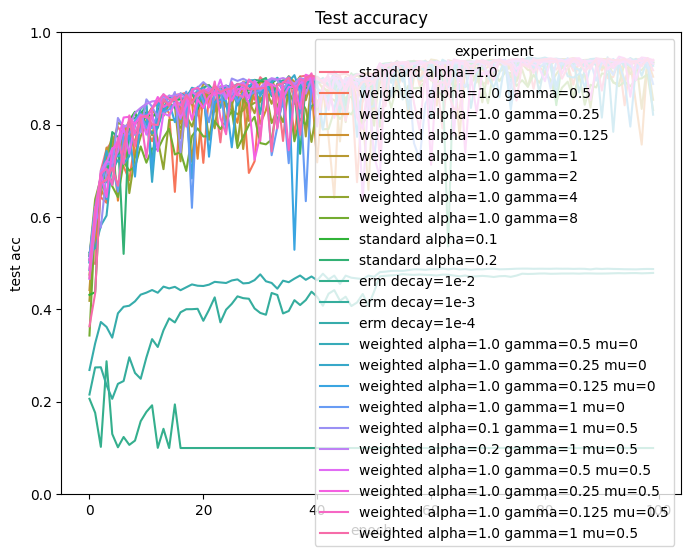

In [66]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x="epoch", y="test acc", hue="experiment")
plt.ylim(0, 1)
plt.title("Test accuracy")
plt.show()

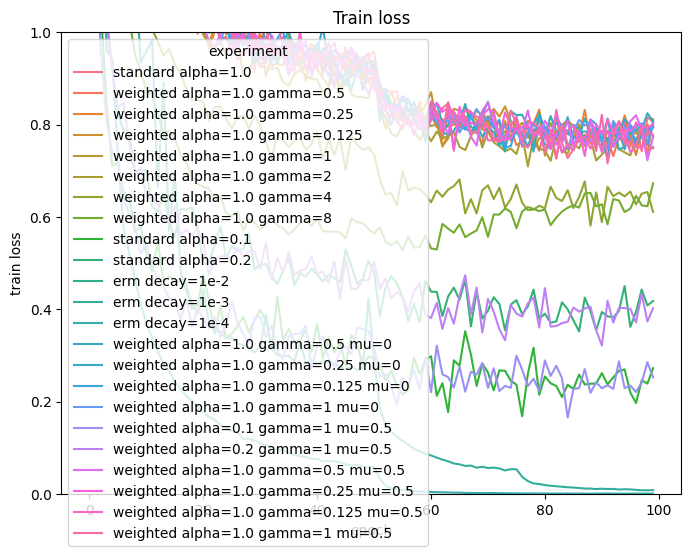

In [67]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x="epoch", y="train loss", hue="experiment")
plt.ylim(0, 1)
plt.title("Train loss")
plt.show()

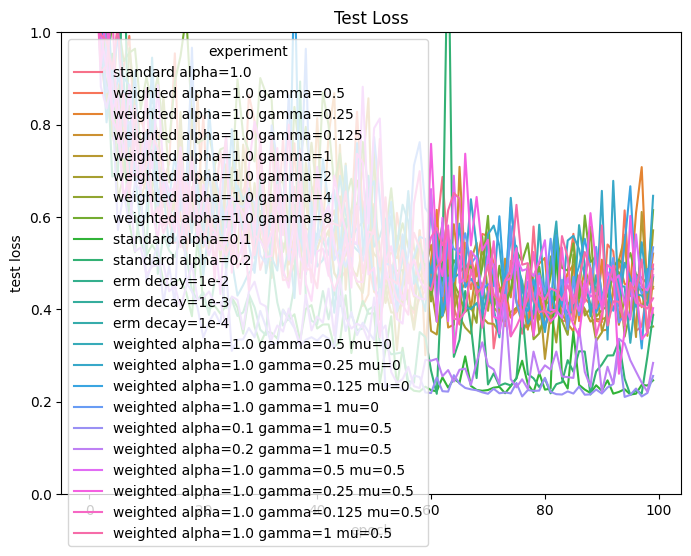

In [68]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x="epoch", y="test loss", hue="experiment")
plt.ylim(0, 1)
plt.title("Test Loss")
plt.show()

In [69]:
def make_doubly_stochastic(matrix, n=100):
    """Convert a matrix to a doubly stochastic matrix using Sinkhorn-Knopp algorithm."""
    for _ in range(n):
        # Row normalization
        matrix = matrix / matrix.sum(axis=1, keepdims=True)
        # Column normalization
        matrix = matrix / matrix.sum(axis=0, keepdims=True)
    return matrix

In [70]:
import torch
import numpy as np


cms_dict = {
    "cm_weighted_0.5": torch.load("results/cm_0_ResNet18_weighted_0.5.pt"),
    "cm_weighted_0.25": torch.load("results/cm_0_ResNet18_weighted_0.25.pt"),
    "cm_weighted_0.125": torch.load("results/cm_0_ResNet18_weighted_0.125.pt"),
    "cm_weighted_1": torch.load("results/cm_0_ResNet18_weighted_1.pt"),
    "cm_weighted_2": torch.load("results/cm_0_ResNet18_weighted_2.pt"),
    "cm_weighted_4": torch.load("results/cm_0_ResNet18_weighted_4.pt"),
    "cm_weighted_8": torch.load("results/cm_0_ResNet18_weighted_8.pt"),
}

cms_df = []
for key, value in cms_dict.items():
    cur_df = pd.DataFrame()
    cms = value.permute(2, 0, 1).numpy()

    std_pre = np.std(cms.reshape(100, -1), axis=1)
    cur_df[f"std_pre"] = std_pre

    gamma = key.split("_")[-1]
    post = cms ** float(gamma)
    for i in range(100):
        post[i] = make_doubly_stochastic(post[i])
    std_post = np.std(post.reshape(100, -1), axis=1)
    cur_df[f"std_post"] = std_post

    cur_df["experiment"] = key
    cur_df["epoch"] = np.arange(100)

    cms_df.append(cur_df)

cms_df = pd.concat(cms_df)

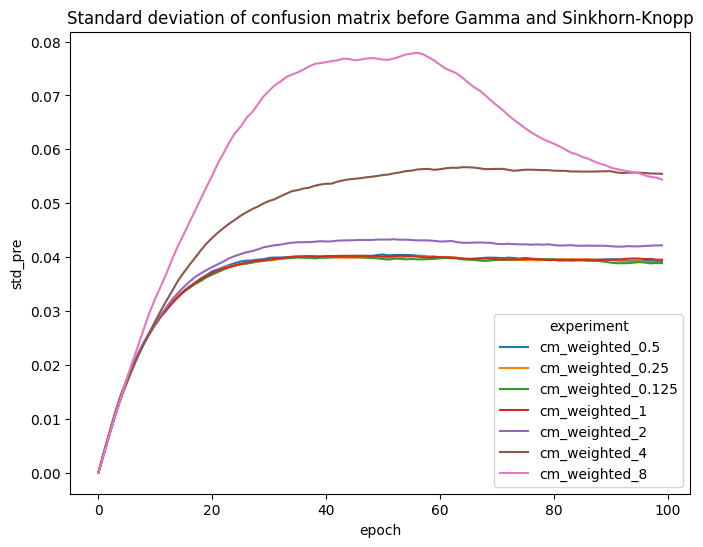

In [71]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=cms_df, x="epoch", y="std_pre", hue="experiment")
plt.title("Standard deviation of confusion matrix before Gamma and Sinkhorn-Knopp")
plt.show()

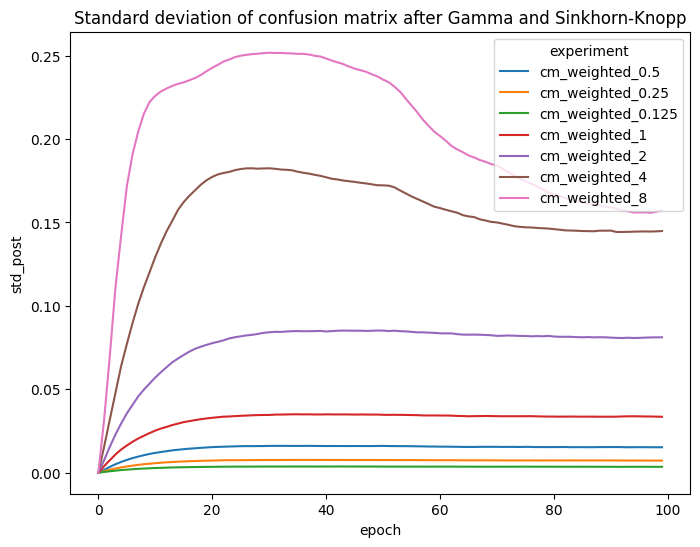

In [72]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=cms_df, x="epoch", y="std_post", hue="experiment")
plt.title("Standard deviation of confusion matrix after Gamma and Sinkhorn-Knopp")
plt.show()